In [1]:
# ! pip install fiftyone

In [2]:
import os
import time
import fiftyone as fo
import fiftyone.zoo as foz

## (A.) Visualize images in FCAT image dataset

In [3]:
# Path of the dataset formatted in ~/images/**/*.jpg and ~/labels/**/*.txt
dataset_dir="fcat/coco/fcat-manacus-v2"

In [4]:
! tree -L 2 $dataset_dir

fcat/coco/fcat-manacus-v2
├── annotations
│   ├── train.json
│   └── validation.json
├── train
│   ├── images
│   └── images.txt
└── validation
    ├── images
    └── images.txt

5 directories, 4 files


#### Load the dataset, using tags to mark the samples in each split

In [5]:
# The type of the dataset being imported
dataset_type = fo.types.COCODetectionDataset
# The splits to load 
splits = ["train", "validation"] # "train", "val", 

In [6]:
# Import the dataset
name = "export_coco_fcat_v1_" + str(time.time())
dataset_train = fo.Dataset.from_dir(
    name = name,
    dataset_type=dataset_type,
    data_path=os.path.join(dataset_dir, splits[0], "images"),
    labels_path=os.path.join(dataset_dir, "annotations", "{}.json".format(splits[0])),
    tags=splits[0]
)

 100% |█████████████████| 822/822 [707.4ms elapsed, 0s remaining, 1.2K samples/s]       


In [7]:
print(dataset_train.stats())

{'samples_count': 822, 'samples_bytes': 568920, 'samples_size': '555.6KB', 'total_bytes': 568920, 'total_size': '555.6KB'}


### Creates a session and opens the App in the output of the cell


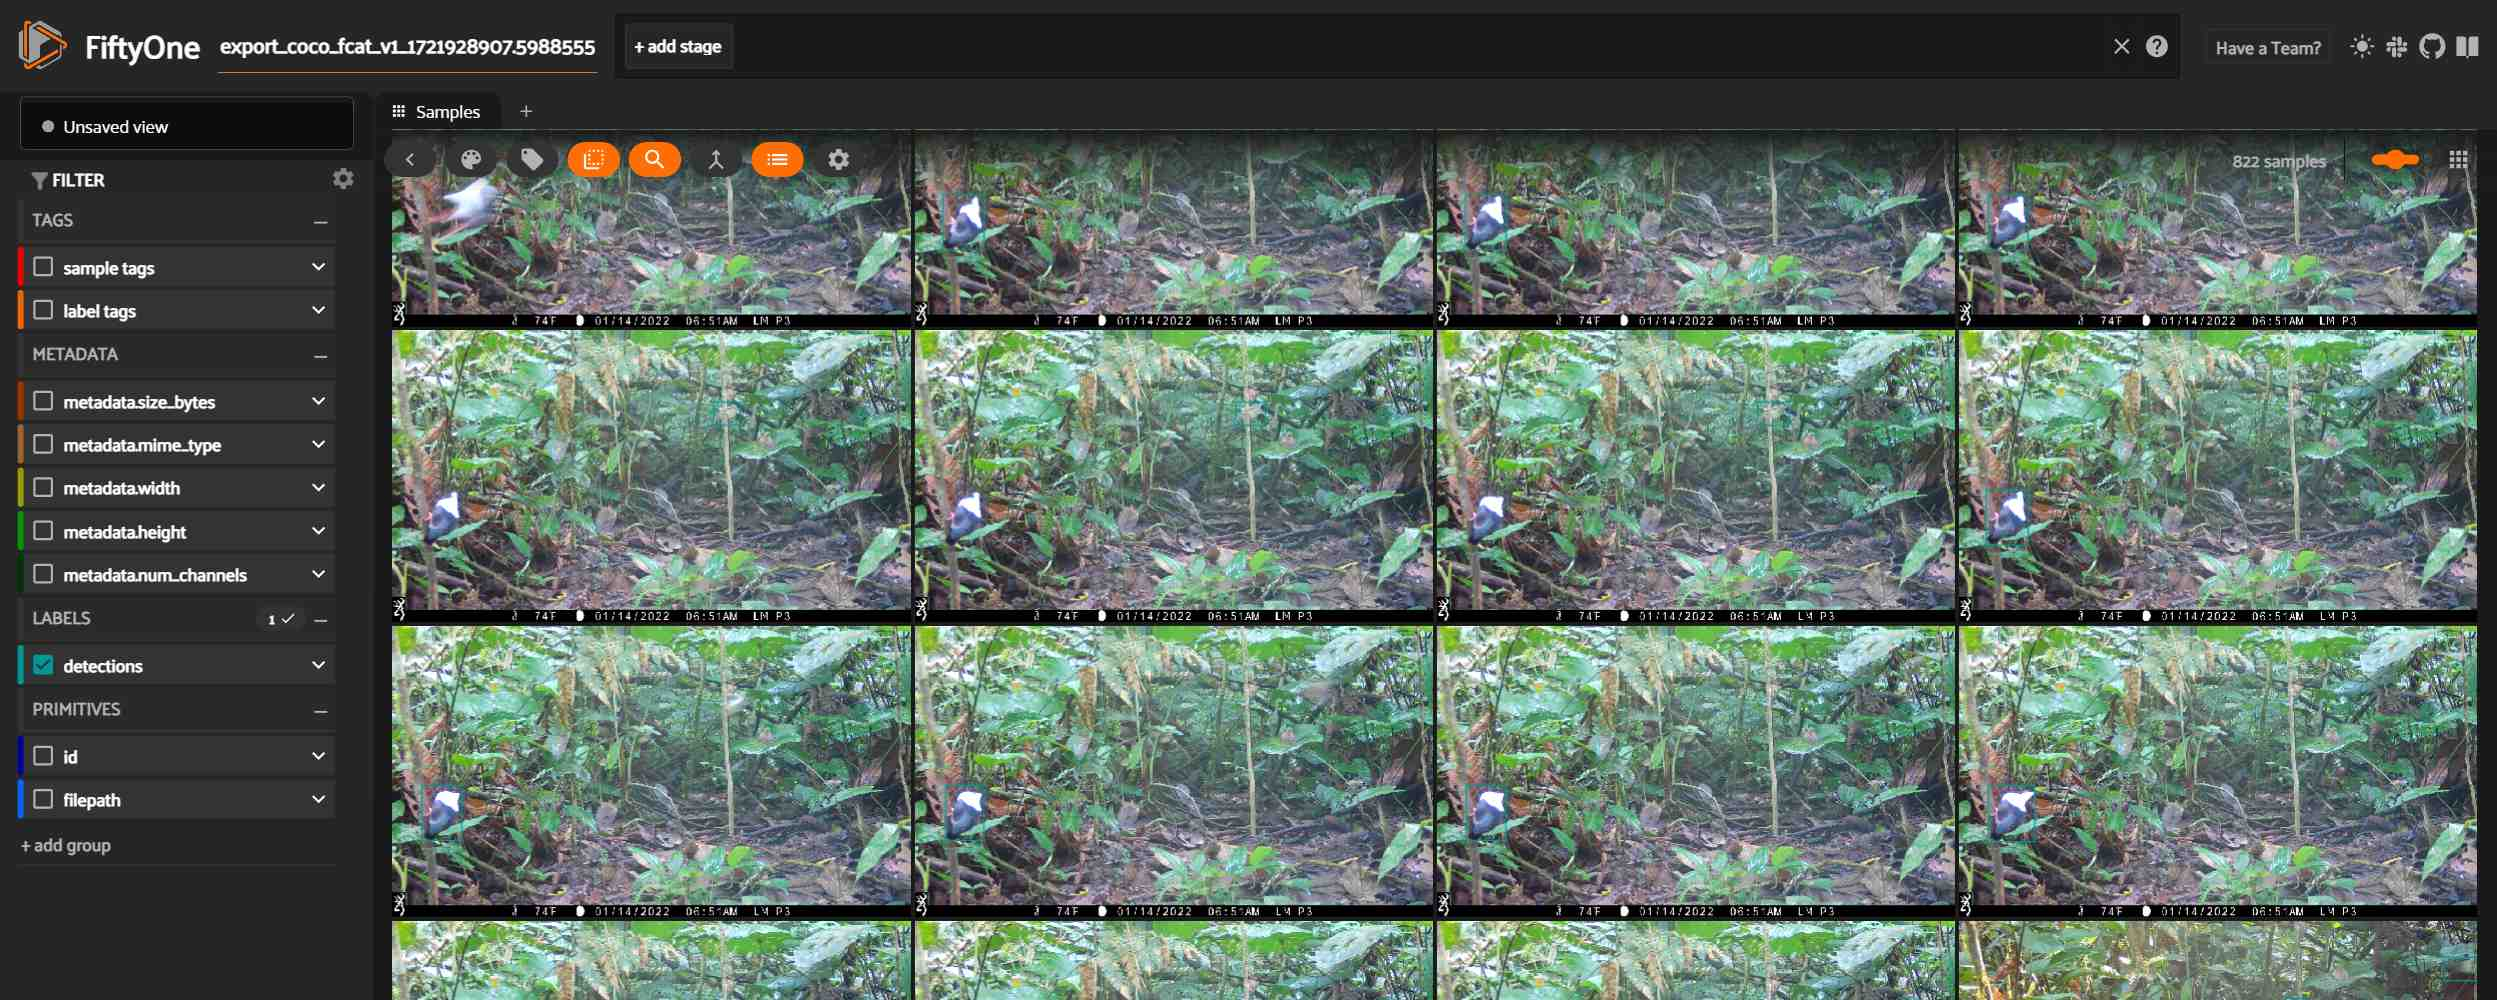

In [8]:
session_a = fo.launch_app(dataset_train)

In [9]:
# Replace active App instance with screenshot so App state is viewable offline
session_a.freeze()

## (B.) Visualize images in eBird image dataset

In [14]:
# Path of the dataset formatted in ~/images/**/*.jpg and ~/labels/**/*.txt
dataset_dir_ebird="ebird/coco"
! tree -L 2 $dataset_dir_ebird

ebird/coco
├── annotations
│   ├── all_images.json
│   ├── cvat_all_sme_v2.json
│   ├── cvat_all_v1.json
│   ├── test.json
│   ├── train.json
│   └── val.json
├── dataset_cocofy.py
├── images_all.csv
├── test
│   └── images
├── train
│   └── images
└── val
    └── images

7 directories, 8 files


In [17]:
# The splits to load 
splits = ["train"] # "train", "val", 
# Import the dataset
dataset_ebird = fo.Dataset.from_dir(
    name = "export_coco_ebird_v1_" + str(time.time()),
    dataset_type=fo.types.COCODetectionDataset,
    data_path=os.path.join(dataset_dir_ebird, splits[0], "images"),
    labels_path=os.path.join(dataset_dir_ebird, "annotations", "{}.json".format(splits[0])),
    tags=splits[0]
)

 100% |███████████████| 2689/2689 [2.2s elapsed, 0s remaining, 1.2K samples/s]      



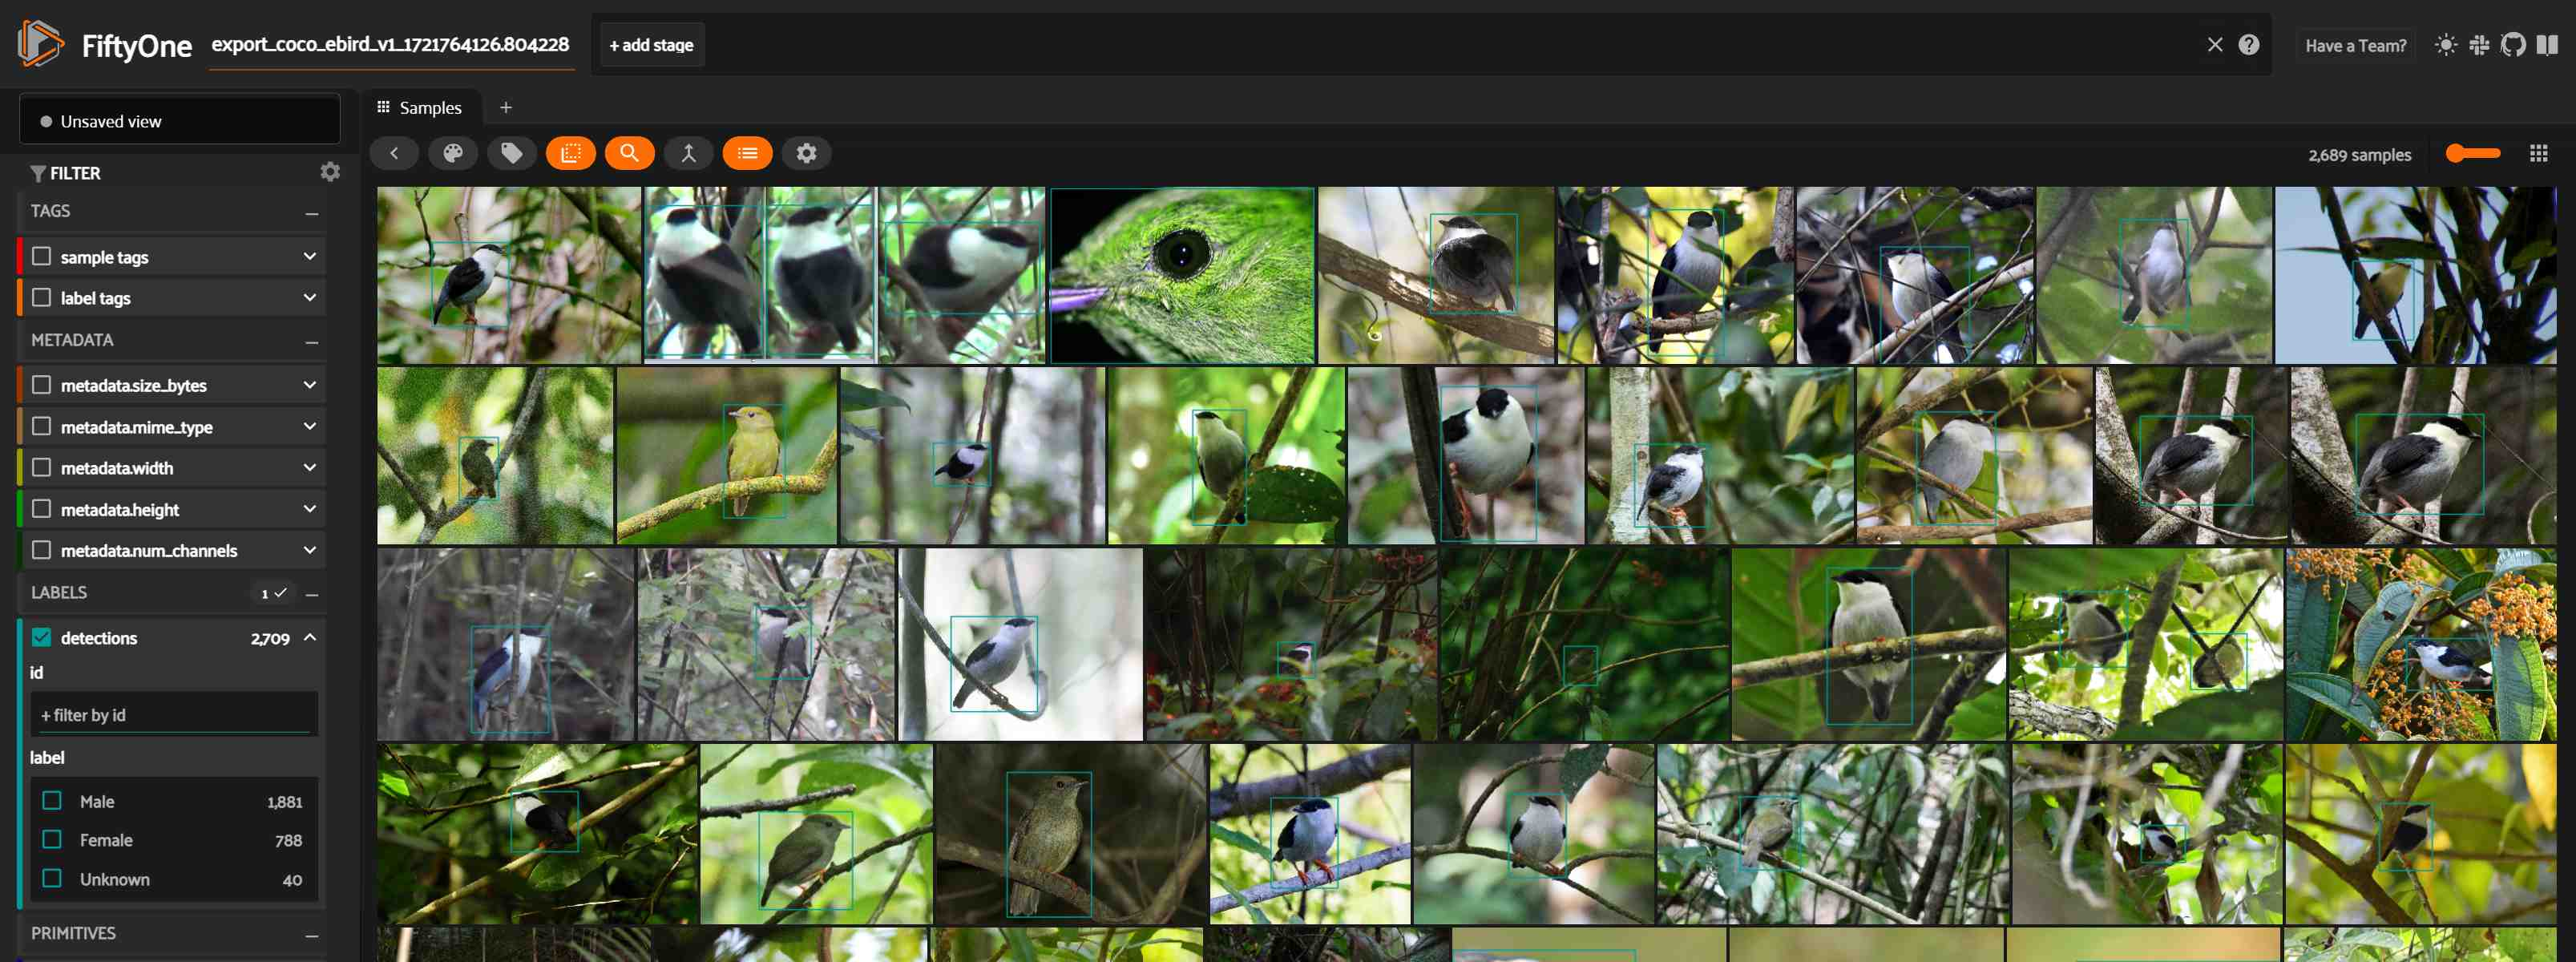

In [18]:
session_ebird = fo.launch_app(dataset_ebird)

In [19]:
# Replace active App instance with screenshot so App state is viewable offline
session_ebird.freeze()